### Imports

In [46]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import pyplot

# Estilos de Seaborn
sns.set()
sns.set_palette(palette='colorblind')

### Carga de datos

In [73]:
columnas_cargar = [ "created","application_id", "ref_type", "attributed", "implicit",
                   "device_brand", "event_uuid", "kind", "wifi", 'ref_hash']

installs = pd.read_csv("../../../data/installs.csv", usecols=columnas_cargar, parse_dates=["created"])

columnas_cargar = ['event_uuid', 'attributed', 'kind']

eventos = pd.read_csv('../../../data/events.csv', usecols=columnas_cargar)

eventos= eventos.rename(columns = {"attributed": "attributed_evento", 'kind': 'kind_evento'})

In [48]:
installs.dtypes

created           datetime64[ns]
application_id             int64
ref_type                   int64
ref_hash                   int64
attributed                  bool
implicit                    bool
device_brand             float64
event_uuid                object
kind                      object
wifi                      object
dtype: object

# Preguntas:
<li> kind de installs
<li> aplicaciones con más installs
<li> aplicacion con subastas y mas installs
                                    
                   

## Cuántos installs hubieron? 

In [49]:
installs.ref_hash.count()

3412

## Cuántos fueron atribuidos a Jampp?

In [50]:
installs[installs["attributed"]].ref_hash.count()

0

# Análisis de Installs en el tiempo

### Cómo evolucionaron los installs en el mes?

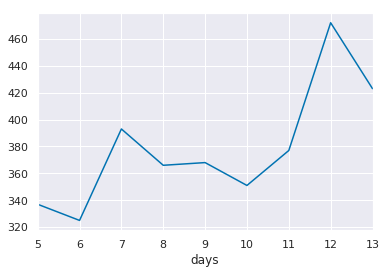

In [51]:
# add a column hours and days
installs["hours"] = installs['created'].dt.hour
installs["days"] = installs['created'].dt.day

installs_por_dia = installs.groupby(installs['days']).ref_hash.agg("count").rename(columns ={"ref_hash":"Cantidad de Installs"})
    
grafico = installs_por_dia.plot(kind="line")


In [52]:
(installs[installs['created'].dt.day == 12])['created'].dt.day_name().iloc[0]

'Tuesday'

### Cómo evolucionaron los installs según la hora del día?

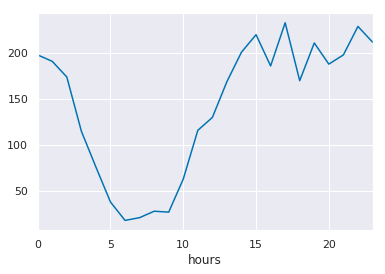

In [53]:
installs_por_hora = installs.groupby(installs['hours']).ref_hash.agg("count").rename(columns ={"ref_hash":"Cantidad de Installs"})
    
grafico = installs_por_hora.plot(kind="line")


Text(111.5, 0.5, 'Cantidad de Installs')

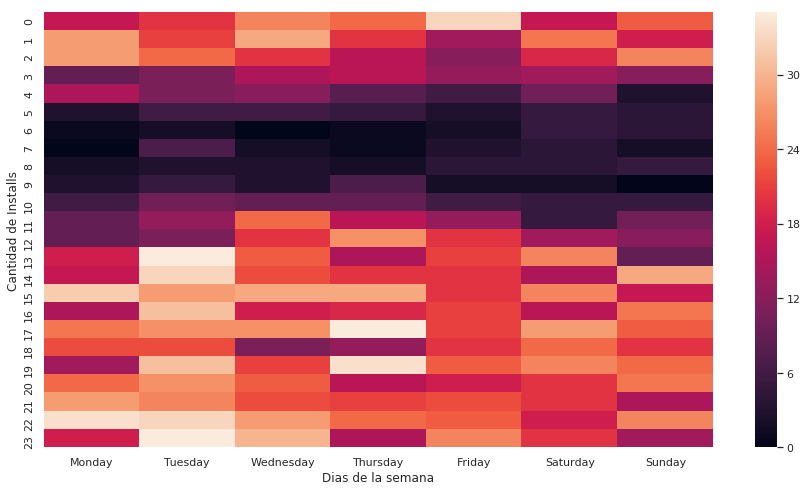

In [54]:
installs["day_of_week"] = installs["created"].dt.day_name()
install_count = installs[(installs["created"] >= "03-07-2019")]\
                .groupby( [pd.Grouper(key="created",freq="h"),"day_of_week" ])["ref_hash"].count().reset_index()
intalls_por_dia_hora = install_count.pivot("created","day_of_week","ref_hash").reset_index()
intalls_por_dia_hora["created"] = intalls_por_dia_hora["created"].dt.hour  
intalls_por_dia_hora = intalls_por_dia_hora.groupby("created").agg("sum")
column_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
intalls_por_dia_hora = intalls_por_dia_hora.reindex(column_order, axis=1)

fig,ax = plt.subplots(figsize = (15,8))
sns.heatmap(intalls_por_dia_hora)
ax.set_xlabel("Dias de la semana")
ax.set_ylabel("Cantidad de Installs")


# Análisis de Installs en el por marcas

### Cuáles marcas tuvieron más installs?

In [55]:
installs_por_marca = installs.groupby(installs['device_brand']).agg({"ref_hash" : "count"}) 
otros = installs_por_marca[installs_por_marca['ref_hash'] < 100]
installs_por_marca = installs_por_marca[installs_por_marca['ref_hash'] >= 100].reset_index()


In [56]:
adjuntar = pd.DataFrame([['Other', otros.ref_hash.sum()]])
adjuntar.columns = ['device_brand','ref_hash']

installs_por_marca =installs_por_marca.append(adjuntar)
installs_por_marca = installs_por_marca.rename(columns = {"ref_hash": "cantidad_de_instalaciones"})

Text(0.5, 0, 'Marca')

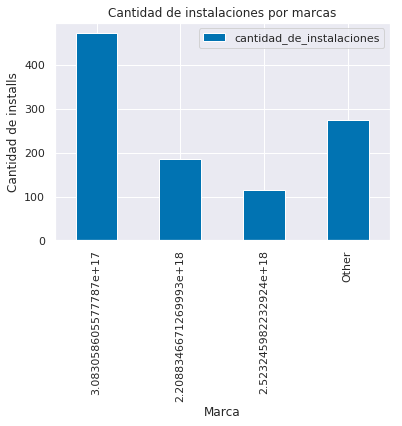

In [57]:
installs_por_marca.plot(x='device_brand', y='cantidad_de_instalaciones',kind="bar")
plt.title("Cantidad de instalaciones por marcas")
plt.ylabel("Cantidad de installs")
plt.xlabel("Marca")


# Análisis de Installs y WIFI


### Installs con WIFI ?

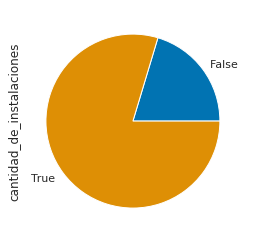

In [58]:
install_con_wifi = installs.rename(columns = {"ref_hash": "cantidad_de_instalaciones"})
install_con_wifi.groupby(install_con_wifi['wifi']).cantidad_de_instalaciones.count().plot.pie()


In [59]:
install_con_wifi.groupby(install_con_wifi['wifi']).cantidad_de_instalaciones.count()

wifi
False     352
True     1377
Name: cantidad_de_instalaciones, dtype: int64

# Eventos y Installs

### Eventos anteriores al install

In [111]:
install_evento = pd.merge(installs.dropna(subset=['event_uuid']), eventos , how='inner', on='event_uuid')

In [112]:
install_evento_ant = install_evento.groupby(install_evento['kind_evento']).agg({"ref_hash" : "count"}) 

otros = install_evento_ant[install_evento_ant['ref_hash'] < 10]
install_evento_ant = install_evento_ant[install_evento_ant['ref_hash'] >= 10].reset_index()


In [113]:
adjuntar = pd.DataFrame([['Other', otros.ref_hash.sum()]])
adjuntar.columns = ['kind_evento','ref_hash']

install_evento_ant =install_evento_ant.append(adjuntar)
install_evento_ant = install_evento_ant.rename(columns = {"ref_hash": "cantidad_de_instalaciones_por_evento"})

Text(0.5, 0, 'Evento')

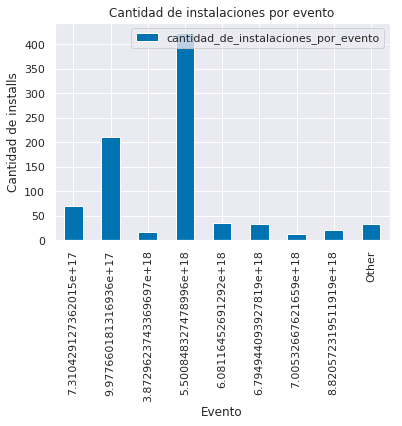

In [114]:
install_evento_ant.plot(x='kind_evento', y='cantidad_de_instalaciones_por_evento',kind="bar")
plt.title("Cantidad de instalaciones por evento")
plt.ylabel("Cantidad de installs")
plt.xlabel("Evento")


In [107]:
install_evento.head()

,kind_evento,cantidad_de_instalaciones_por_evento
0,7.31043e+17,70
1,9.97766e+17,212
2,3.87296e+18,17
3,5.50085e+18,423
4,6.08116e+18,36
